# Project: Bank Customer Churn Prediction
## Data Cleaning & Exploratory Data Analysis (EDA)

**Objectives:**

- Clean the data, remove redundant columns.

- Analyze factors influencing churn prediction.

- Create new features (Feature Engineering) to improve prediction power.

- Prepare clean data for the modeling phase.

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Interface Configuration
sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (12, 6)
# Main Colors: Blue (Existing) and Red (Attrited) for easy differentiation
custom_palette = {0: 'tab:blue', 1: 'tab:red'}
import os
import warnings
warnings.filterwarnings('ignore')

print("Setup Complete. Ready to load data.")

Setup Complete. Ready to load data.


## Data Loading & Helper Functions
Here, we perform 3 tasks:
1. **Load data**: Read the CSV file.

2. **Cleaning**: Remove redundant columns (`CLIENTNUM`, Naive Bayes columns) and encode the target variable `Attrition_Flag` (1 = Leave, 0 = Stay).

3. **Define Functions**: Write the `analyze_numerical` and `analyze_categorical` functions to automate chart plotting.

In [58]:
# 1. Load Data
current_dir = os.getcwd()
file_path = os.path.join(current_dir, '..', 'data', 'raw', 'BankChurners.csv')
df = pd.read_csv(file_path)

# 2. Preprocessing
# Remove the ID column and the last two columns (Data Leakage)
df = df.iloc[:, 1:-2]

# Map Target: Existing -> 0, Attrited -> 1
df['Attrition_Flag'] = df['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

# 3. Helper Functions (Clean Code Strategy)

def analyze_numerical(col_name, title):
    "Draw a distribution and Boxplot plot according to Churn for the variable."
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    # Chart 1: General Distribution (Histogram + KDE)
    sns.histplot(data=df, x=col_name, kde=True, ax=axes[0], color='teal')
    axes[0].set_title(f'Distribution of {title}')
    
    # Chart 2: Boxplot split according to Churn
    sns.boxplot(data=df, x='Attrition_Flag', y=col_name, ax=axes[1])
    axes[1].set_title(f'{title} vs Churn Status')
    
    plt.tight_layout()
    plt.show()

def analyze_categorical(col_name, title):
    "Draw a count and Churn rate chart for the categorical variable."
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    # Chart 1: count plot
    order = df[col_name].value_counts().index
    sns.countplot(data=df, x=col_name, order=order, ax=axes[0])
    axes[0].set_title(f'Count of {title}')
    axes[0].tick_params(axis='x', rotation=45)
    
    # Chart 2: Churn Ratio (Normalized Stacked Bar)
    cross_tab = pd.crosstab(df[col_name], df['Attrition_Flag'], normalize='index')
    cross_tab = cross_tab.reindex(order)
    
    cross_tab.plot(kind='bar', stacked=True, color=['tab:blue', 'tab:red'], ax=axes[1])
    axes[1].set_title(f'Churn Rate by {title}')
    axes[1].set_ylabel('Proportion')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].legend(title='Status', labels=['Existing', 'Attrited'], loc='upper right')
    
    plt.tight_layout()
    plt.show()

print("Data Loaded & Functions Ready.")

Data Loaded & Functions Ready.


## Target Variable Analysis: Attrition_Flag
Before going into detail, we need to look at the data imbalance rate.

- **Existing Customer (0)**: Current customer.

- **Attrited Customer (1)**: Customer who has left.

Number of customers leaving: 1627 (16.07%)


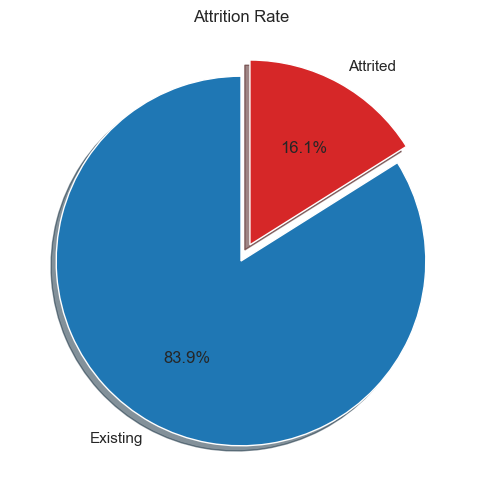

In [59]:
# Calculate Rate
churn_counts = df['Attrition_Flag'].value_counts()
churn_rate = df['Attrition_Flag'].value_counts(normalize=True)

print(f"Number of customers leaving: {churn_counts[1]} ({churn_rate[1]:.2%})")

# Draw a Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=['Existing', 'Attrited'], autopct='%1.1f%%',
colors=['tab:blue', 'tab:red'], explode=(0, 0.1), shadow=True, startangle=90)
plt.title('Attrition Rate')
plt.show()

## Demographic Analysis
We will analyze each column related to customer personal information.

### Customer_Age
The age distribution of customers usually follows a normal distribution. We see whether older or younger people tend to have a higher churn rate.

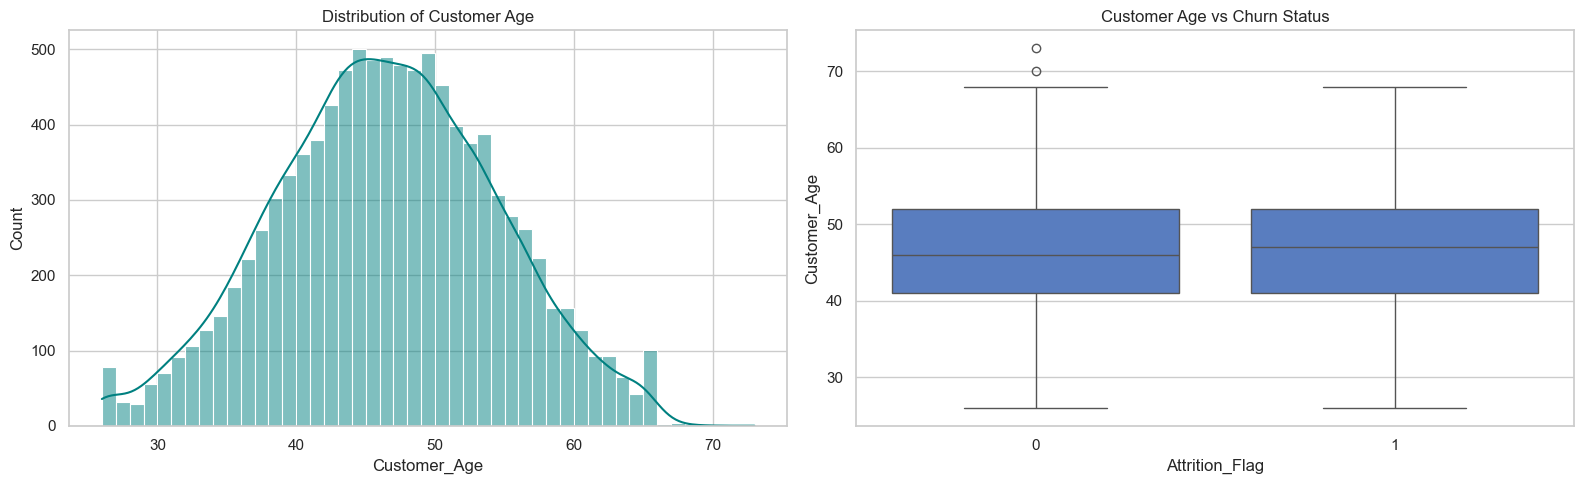

In [60]:
analyze_numerical('Customer_Age', 'Customer Age')

### Gender
Check whether men or women have a higher turnover rate.

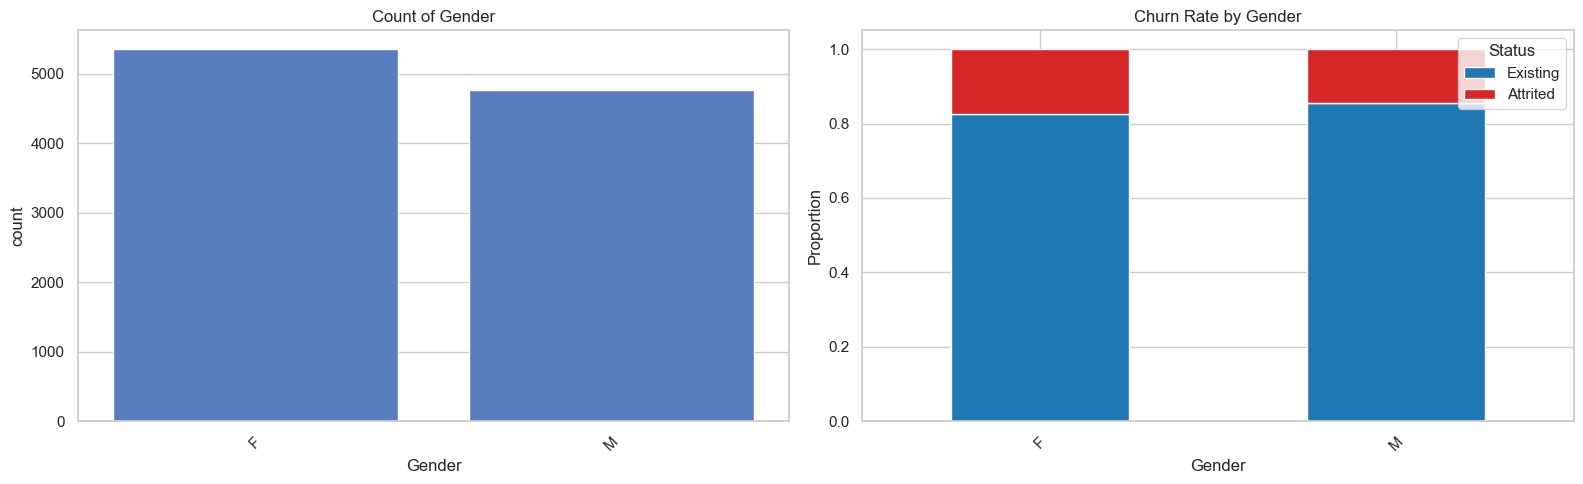

In [61]:
analyze_categorical('Gender', 'Gender')

### Dependent_count
Does the number of dependents affect financial pressure and the decision to leave?

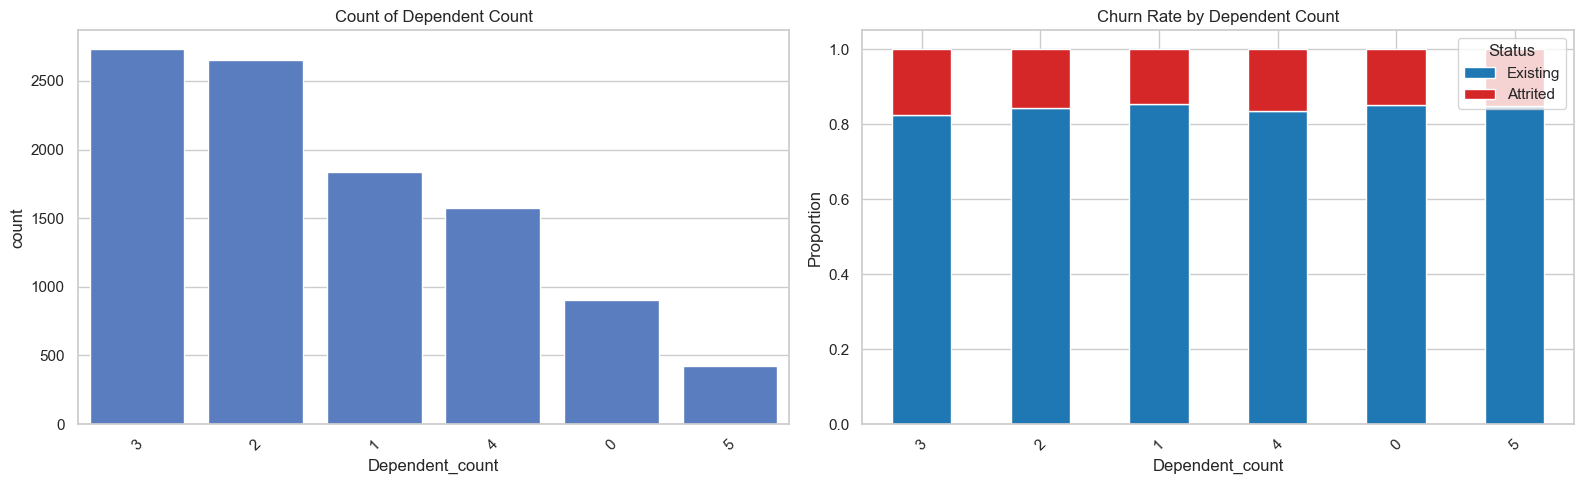

In [62]:
analyze_categorical('Dependent_count', 'Dependent Count')

### Education_Level & Marital_Status & Income_Category
Analysis of education level, marital status, and income.

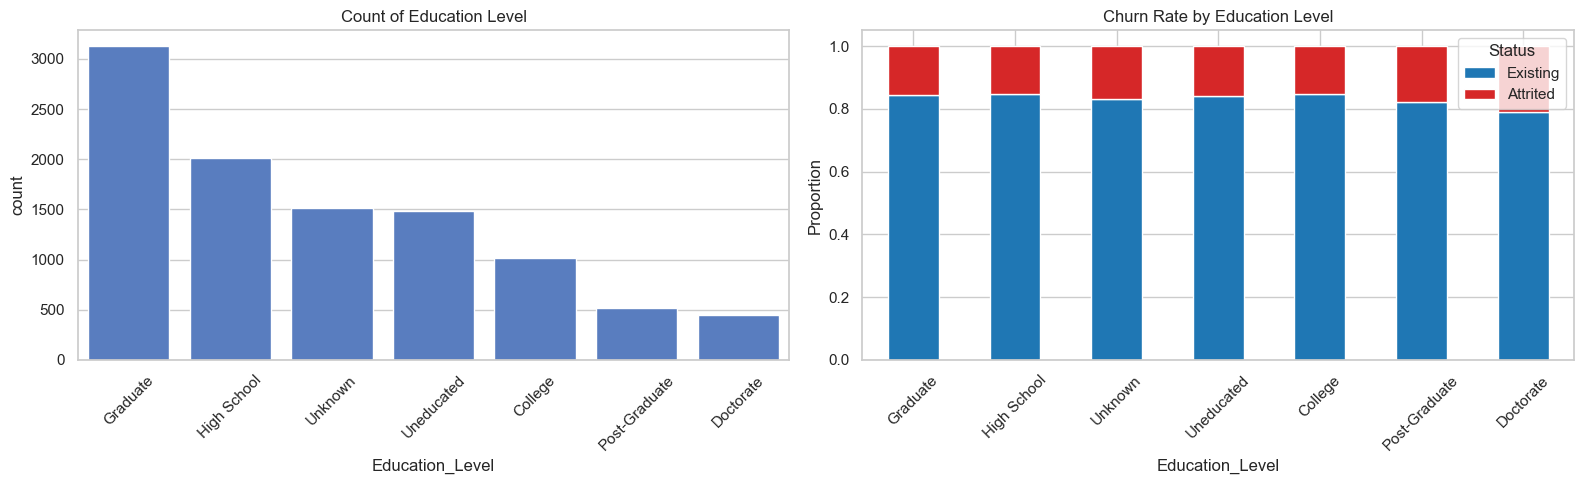

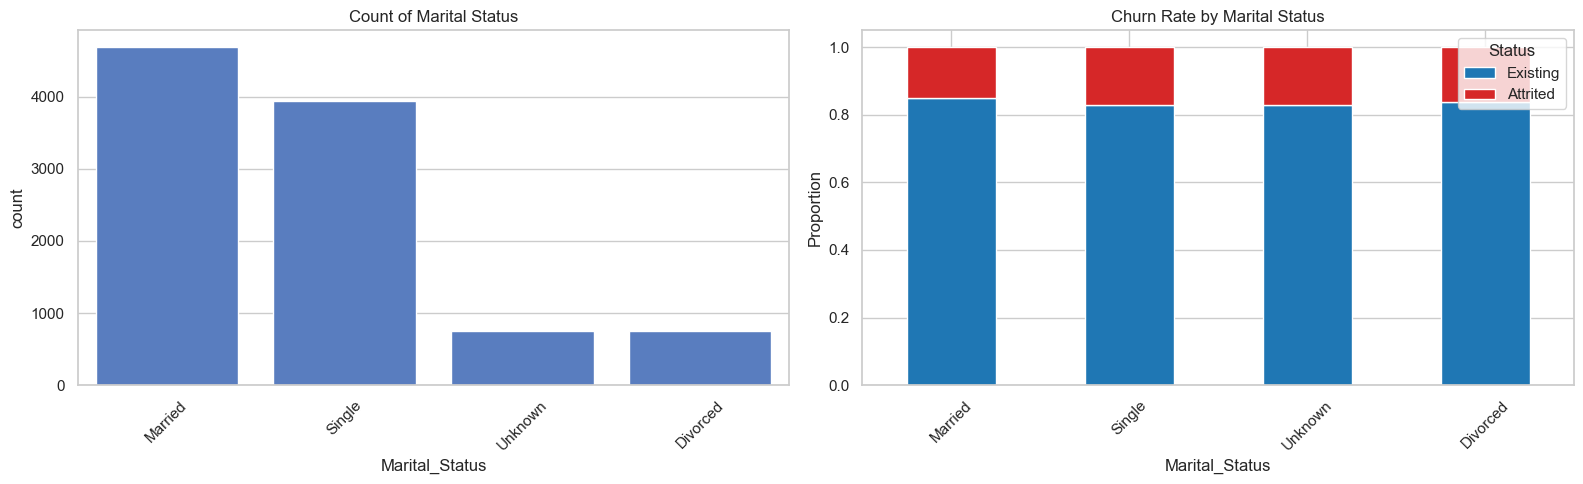

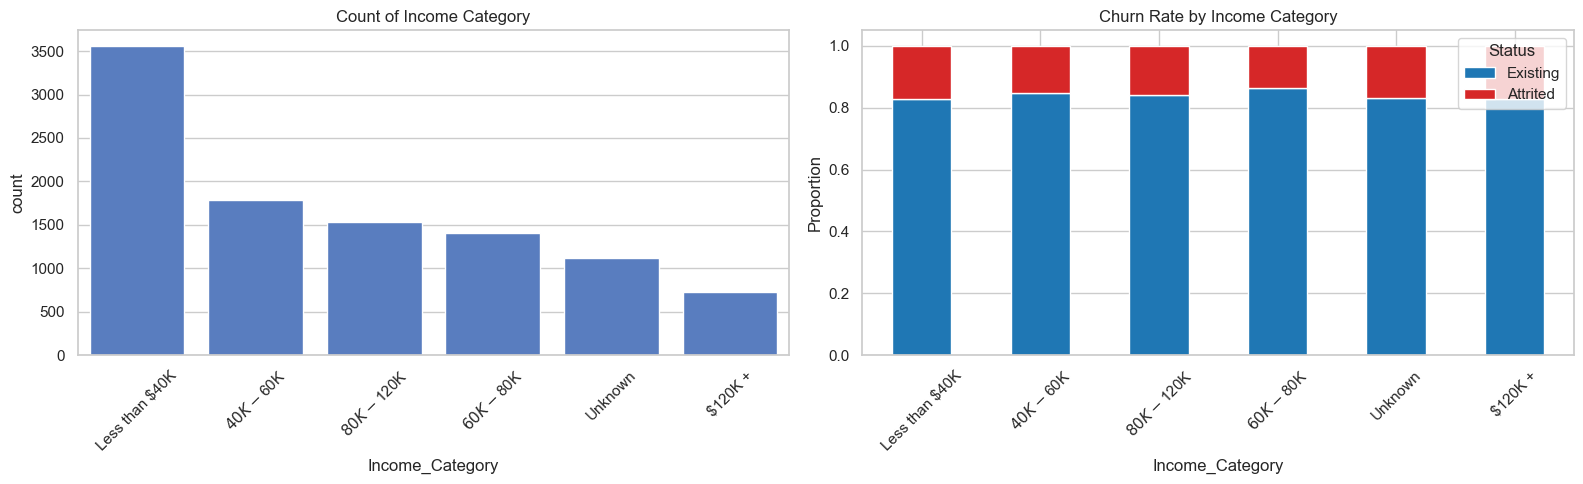

In [63]:
analyze_categorical('Education_Level', 'Education Level')
analyze_categorical('Marital_Status', 'Marital Status')
analyze_categorical('Income_Category', 'Income Category')

## Product Information & Customer Relations

### Card Category
Most customers use Blue cards. Consider whether higher-tier cards (Platinum, Gold) retain customers better.

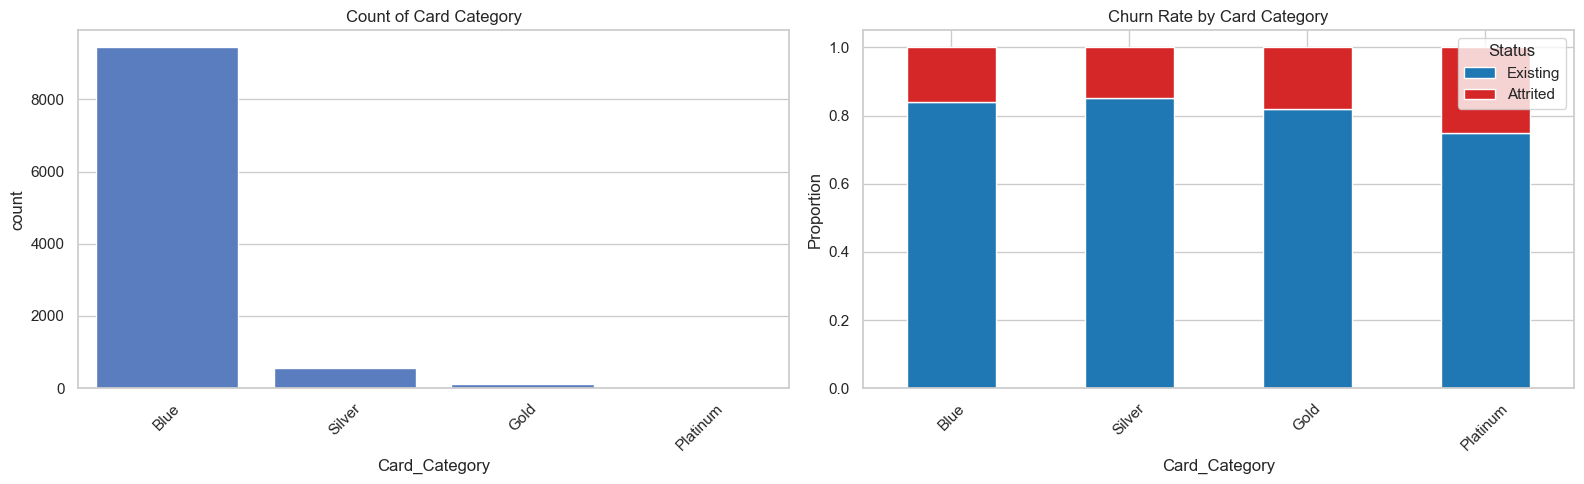

In [64]:
analyze_categorical('Card_Category', 'Card Category')

### Months_on_book (Time on the book)
Are long-term customers more loyal than new customers?

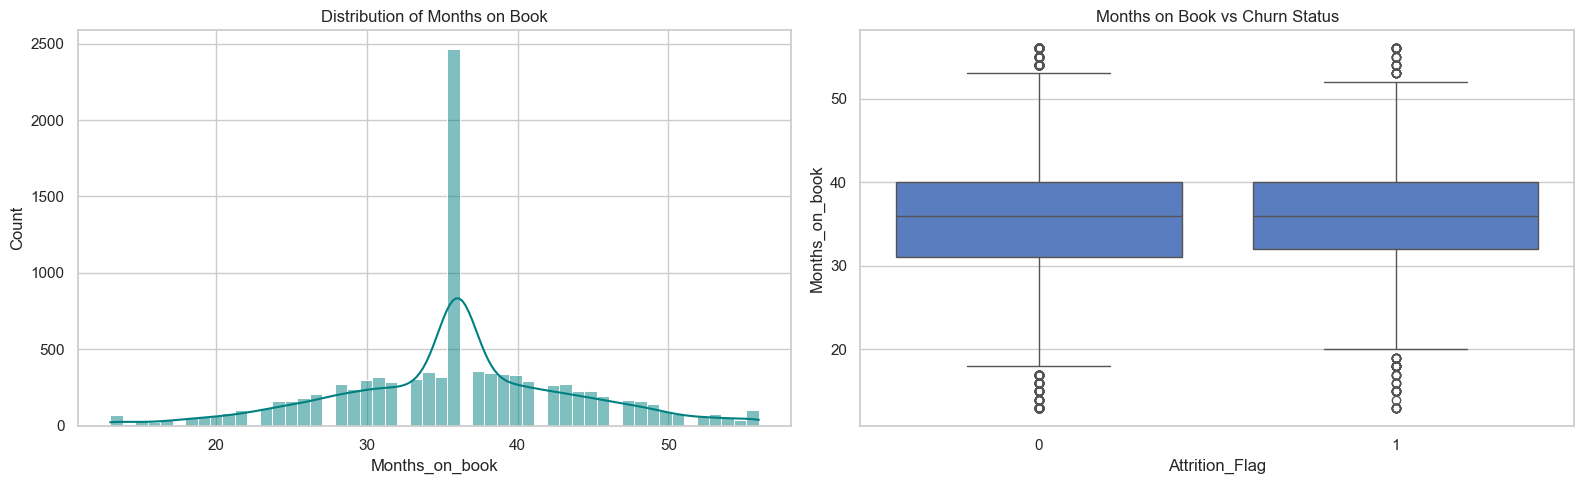

In [65]:
analyze_numerical('Months_on_book', 'Months on Book')

### Total_Relationship_Count (Total number of products currently in use)
This is an important indicator. Common logic: The more banking products you use, the harder it is to quit.

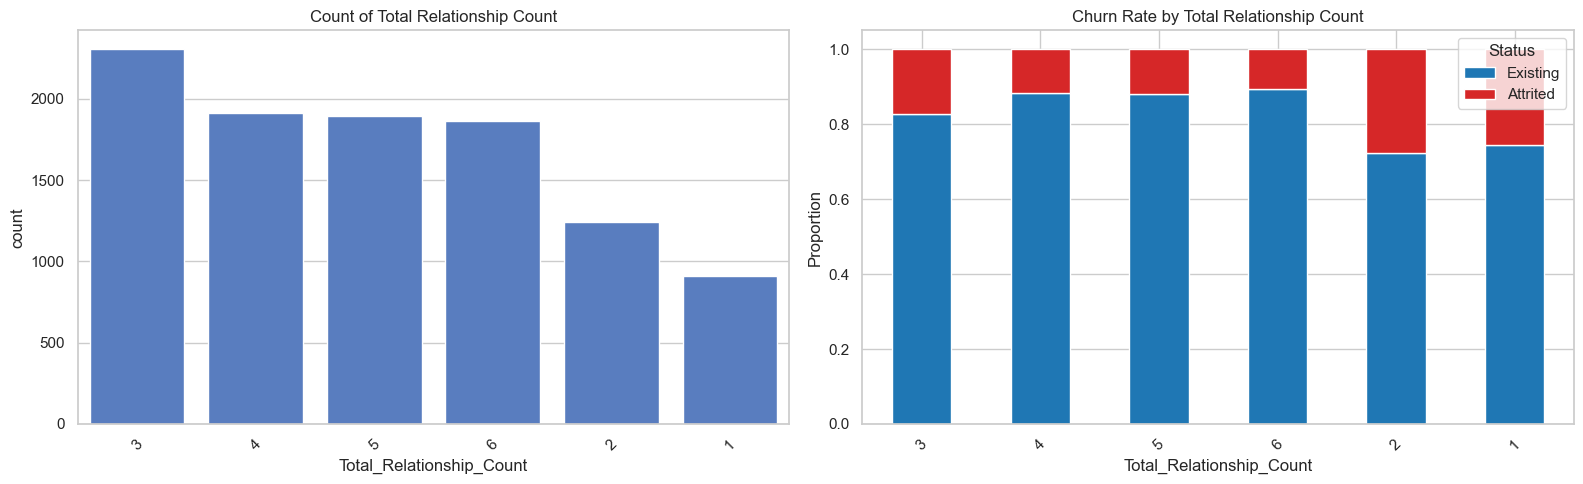

In [66]:
analyze_categorical('Total_Relationship_Count', 'Total Relationship Count')

## Trading Behavior & Financial Indicators (Key Drivers)
These are often the most predictive variables in the Churn problem.

### Months_Inactive_12_mon (Number of inactive months)
Data for the past 12 months. If a client is inactive for a long time, the likelihood of them leaving is very high.

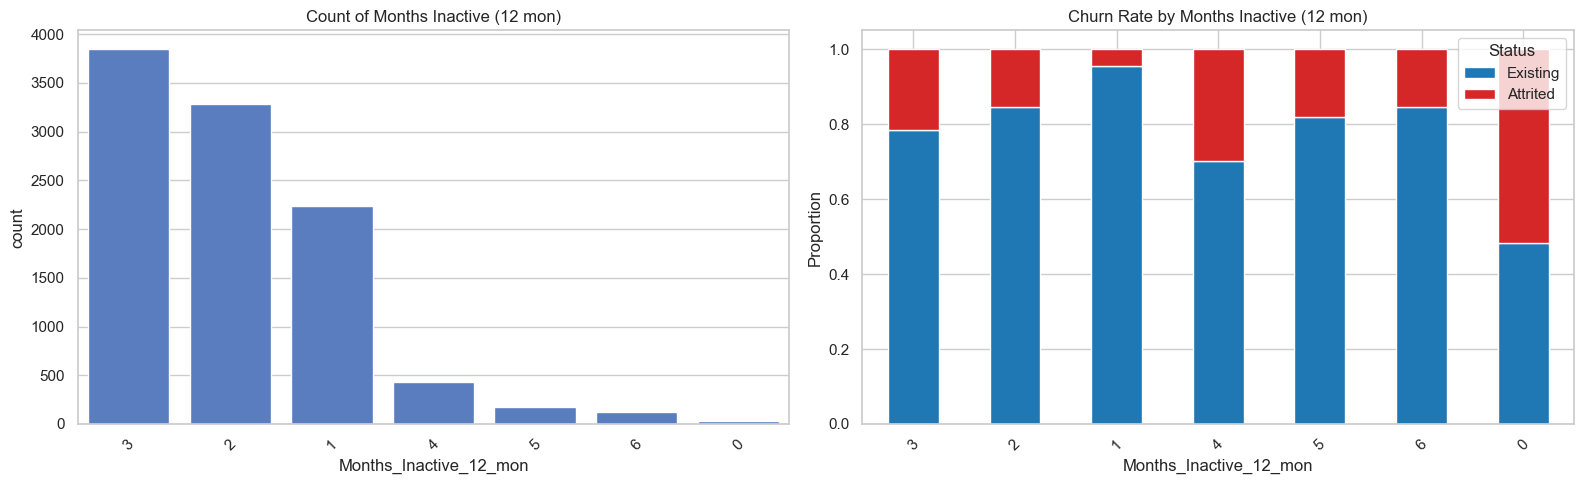

In [67]:
analyze_categorical('Months_Inactive_12_mon', 'Months Inactive (12 mon)')

### Contacts_Count_12_mon (Number of contacts with the bank)
Customers who contact the bank frequently (complaints, support) often show signs of dissatisfaction.

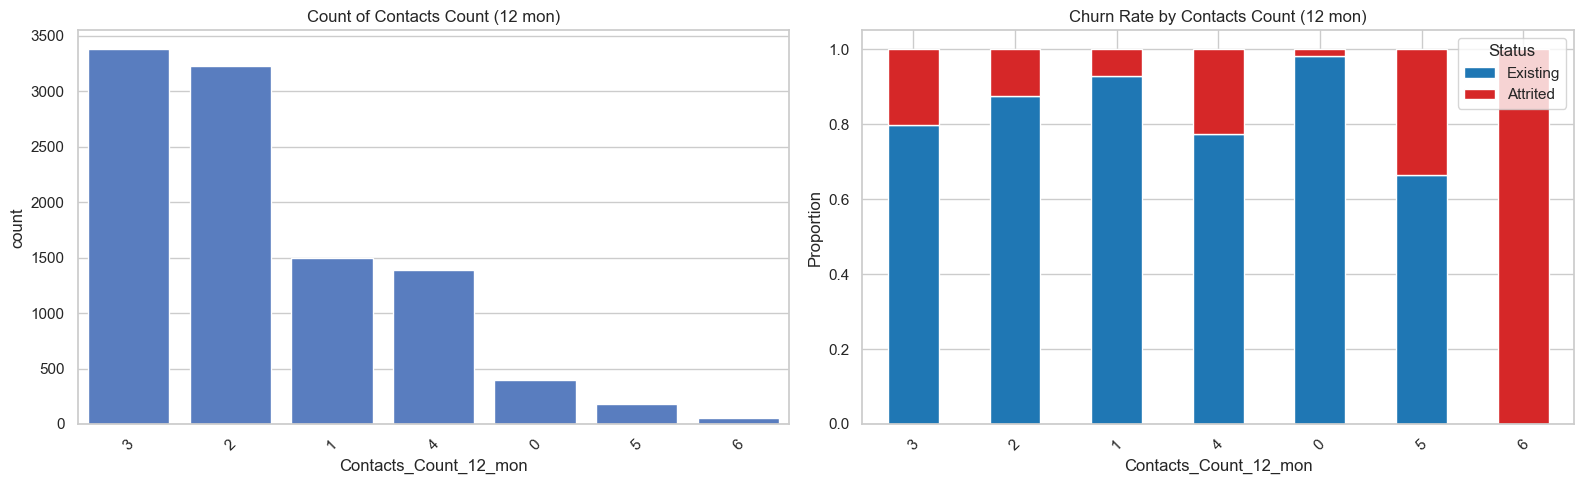

In [68]:
analyze_categorical('Contacts_Count_12_mon', 'Contacts Count (12 mon)')

### Credit Limit & Avg Utilization Ratio
- **Credit Limit**: How does a high or low credit limit affect performance?

- **Utilization Ratio**: The rate of card usage. Frequent card users (high ratio) are usually loyal customers.

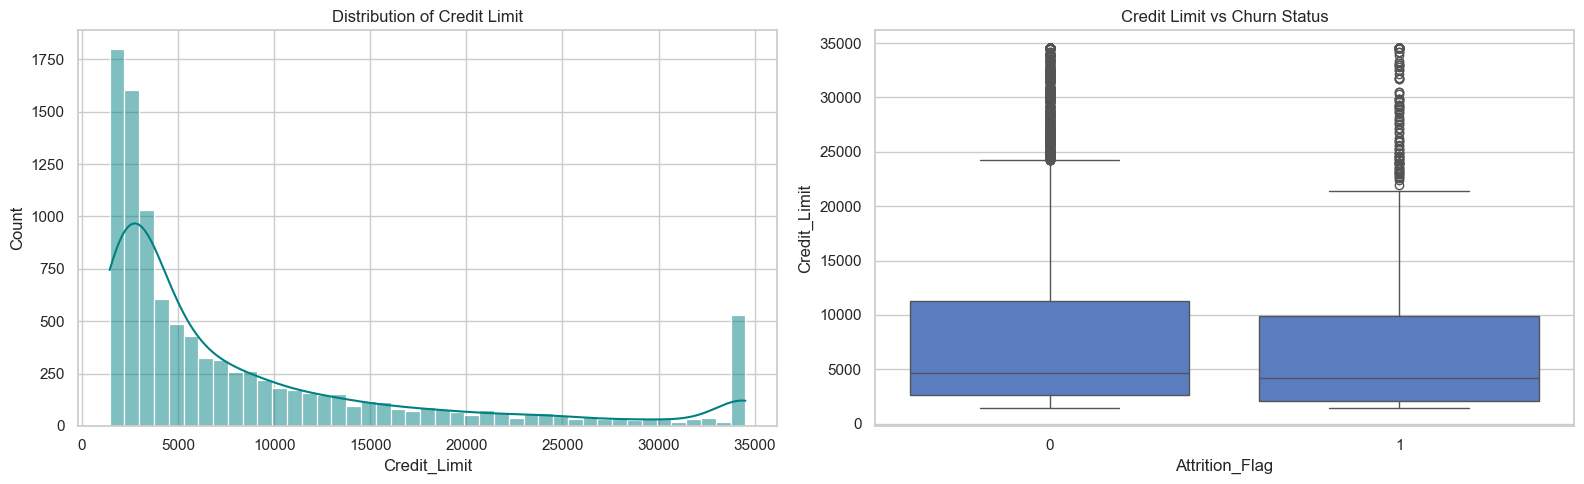

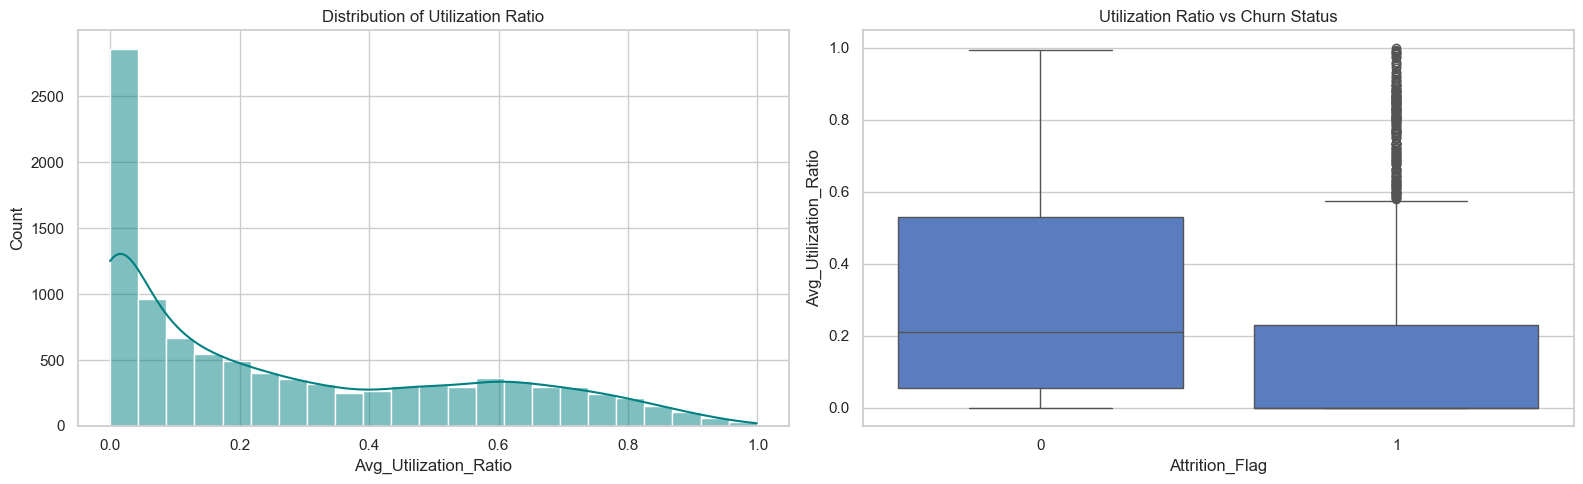

In [69]:
analyze_numerical('Credit_Limit', 'Credit Limit')
analyze_numerical('Avg_Utilization_Ratio', 'Utilization Ratio')

### Total_Trans_Amt (Total Transaction Amount) & Total_Trans_Ct (Total Number of Transactions)
**This is the "heart" of the analysis.** - Customers leaving tend to experience a sudden decrease in transactions.

- Boxplot and distribution charts will show a clear separation between the two groups.

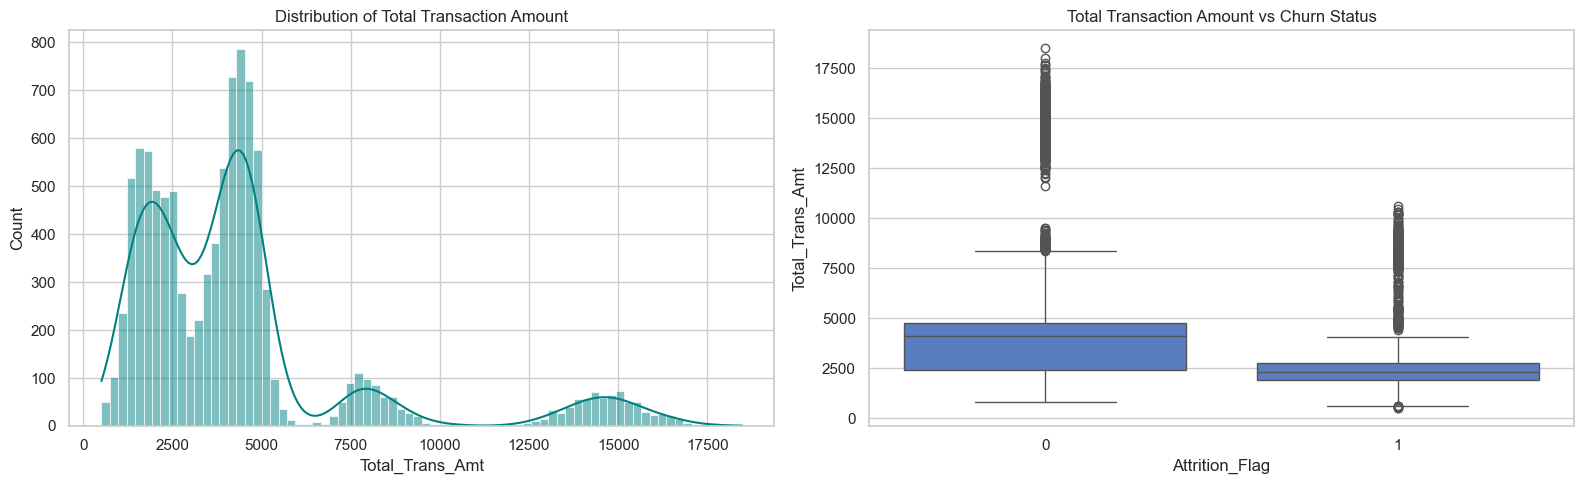

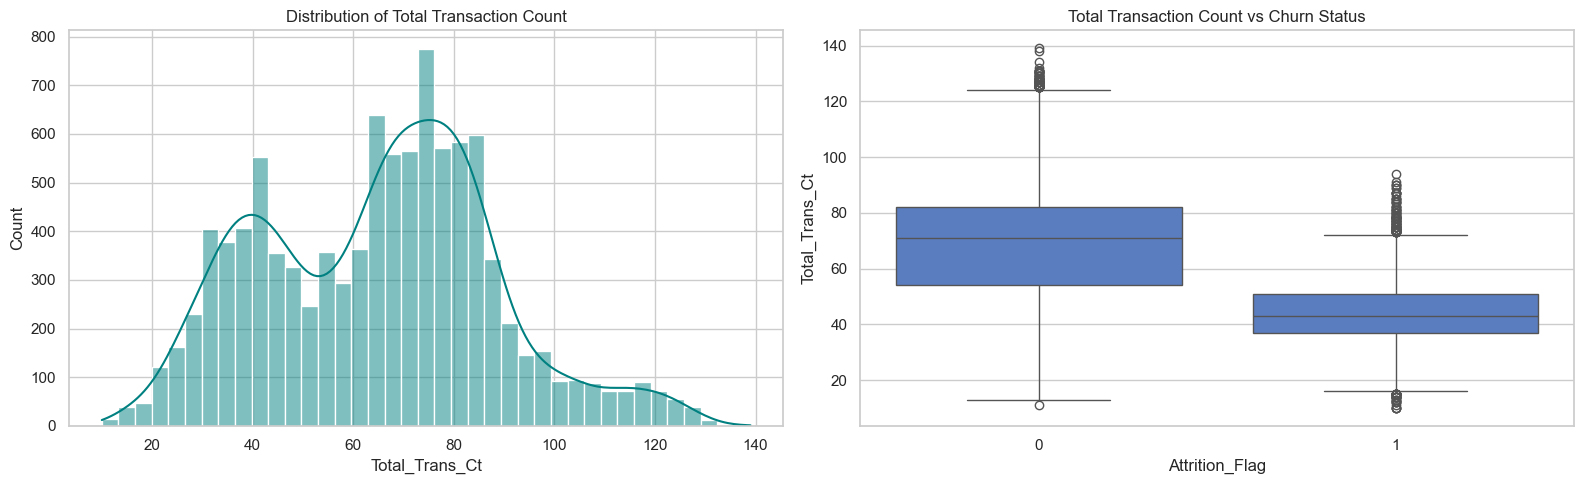

In [70]:
analyze_numerical('Total_Trans_Amt', 'Total Transaction Amount')
analyze_numerical('Total_Trans_Ct', 'Total Transaction Count')

### Total_Revolving_Bal
The amount of money a customer still owes on their card. If the debt is 0 (paid off monthly or not used), the risk of leaving is generally higher than for those with debt (because they are borrowing money from the bank).

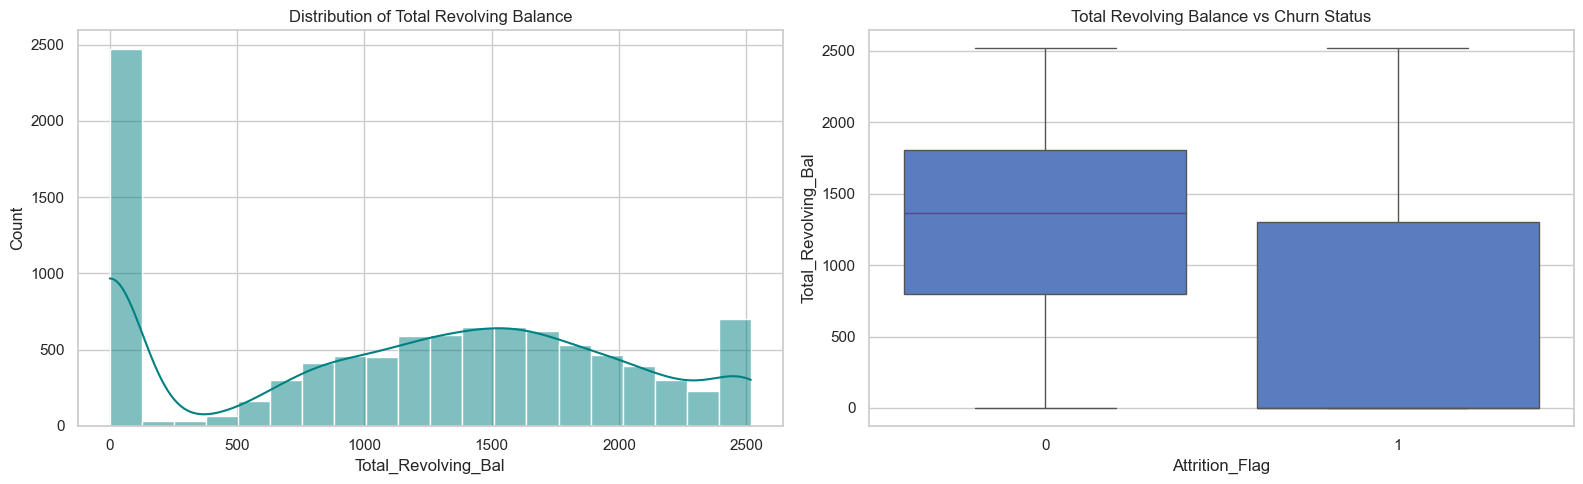

In [71]:
analyze_numerical('Total_Revolving_Bal', 'Total Revolving Balance')

## Correlation Heatmap
A summary of the relationships between variables.
Note:
- **Credit_Limit** and **Avg_Open_To_Buy** are usually correlated at 1 (because Open = Limit - Balance).

- **Total_Trans_Ct** and **Total_Trans_Amt** are usually strongly correlated (more transactions mean a larger total amount).

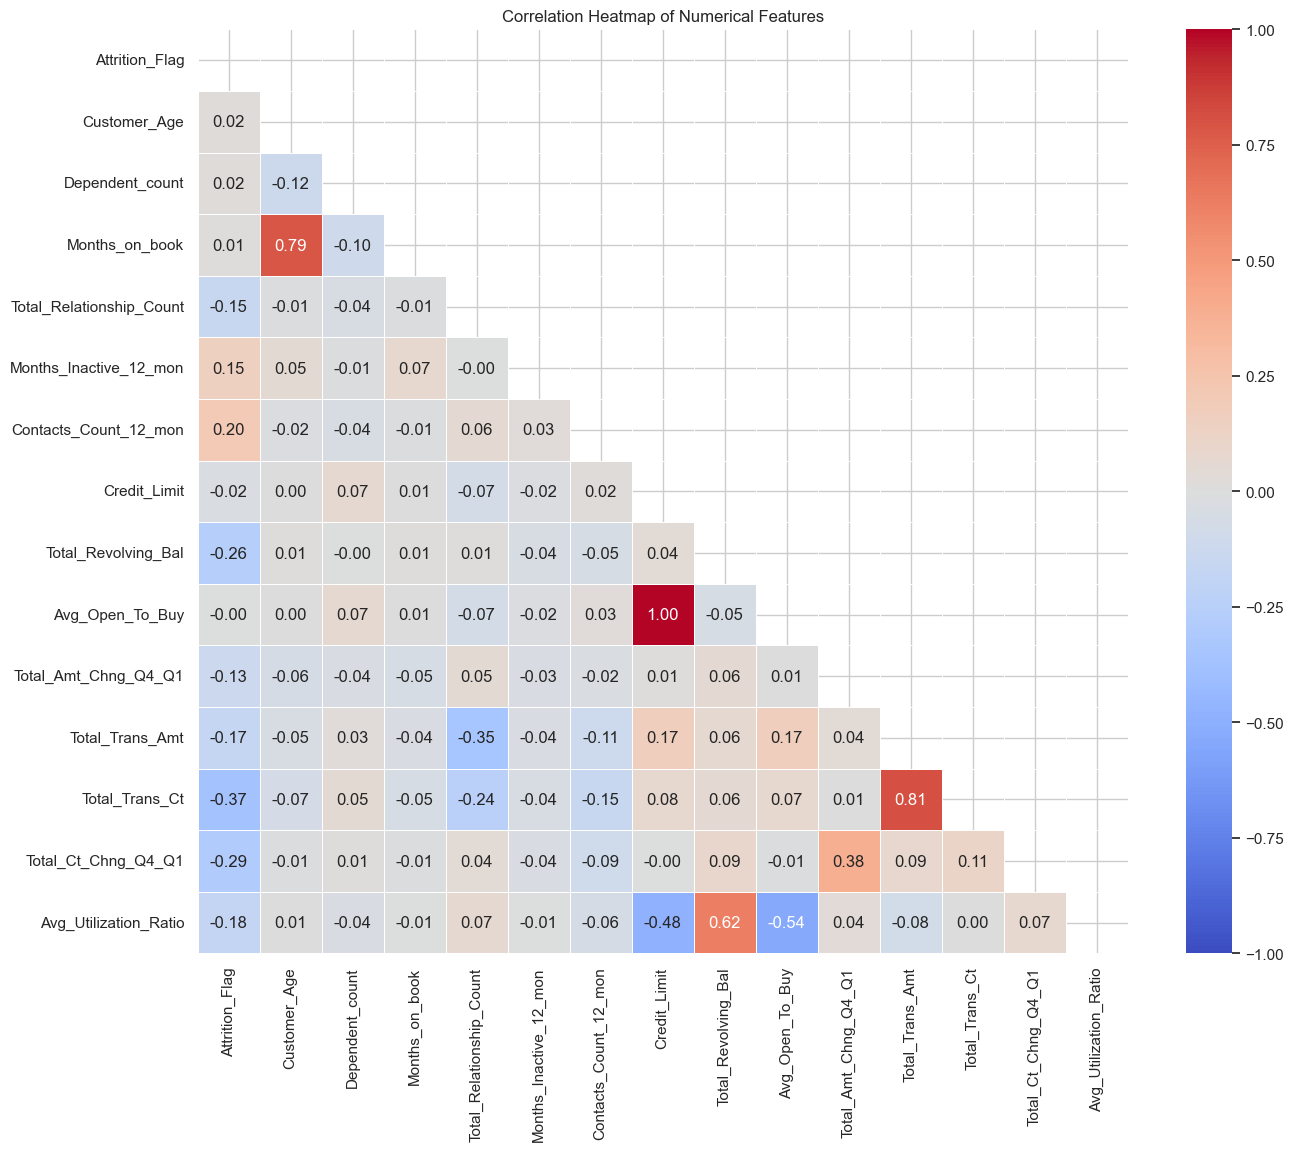

In [72]:
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(15, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', 
            vmin=-1, vmax=1, center=0, linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Customer_Age and Months_on_book have a very strong correlation and there is likely duplicate information, so we will handle multicollinearity using Feature Engineering.

In [73]:
correlation_with_target = numeric_df.corrwith(df['Attrition_Flag']).abs().sort_values(ascending=False)
print(correlation_with_target)

Attrition_Flag              1.000000
Total_Trans_Ct              0.371403
Total_Ct_Chng_Q4_Q1         0.290054
Total_Revolving_Bal         0.263053
Contacts_Count_12_mon       0.204491
Avg_Utilization_Ratio       0.178410
Total_Trans_Amt             0.168598
Months_Inactive_12_mon      0.152449
Total_Relationship_Count    0.150005
Total_Amt_Chng_Q4_Q1        0.131063
Credit_Limit                0.023873
Dependent_count             0.018991
Customer_Age                0.018203
Months_on_book              0.013687
Avg_Open_To_Buy             0.000285
dtype: float64


### Creating New Variables (Feature Engineering)
We will create three additional ratio variables to more clearly reflect customer spending behavior:
- `Age_at_Onboarding`: Age at the time of opening the card.

- `Avg_Trans_Value`: Average value per transaction.

- `Trans_to_Limit_Ratio`: Card usage level relative to the limit (different from Utilization Ratio).

- `Activity_Per_Relationship`: Transaction frequency relative to the number of products being used.

In [74]:
def create_new_features(df_input):
    df_new = df_input.copy()
    # 1. Age at the time of opening the card
    df_new['Age_at_Onboarding'] = df_new['Customer_Age'] - (df_new['Months_on_book'] / 12)
    # 2. Average value per transaction
    # Add 0.001 to avoid division by zero error
    df_new['Avg_Trans_Value'] = df_new['Total_Trans_Amt'] / (df_new['Total_Trans_Ct'] + 0.001)
    # 3. Ratio of total transaction amount to credit limit
    df_new['Trans_to_Limit_Ratio'] = df_new['Total_Trans_Amt'] / (df_new['Credit_Limit'] + 0.001)
    # 4. Average number of transactions per banking product used
    df_new['Activity_Per_Relationship'] = df_new['Total_Trans_Ct'] / (df_new['Total_Relationship_Count'] + 0.001) 

    # Keep Customer_Age (due to higher correlation), Delete Months_on_book
    df_new = df_new.drop(columns=['Months_on_book'])
    
    return df_new

# Apply feature constructor
df = create_new_features(df)

print("New features have been created.")
display(df[['Age_at_Onboarding','Avg_Trans_Value', 'Trans_to_Limit_Ratio', 'Activity_Per_Relationship']].head())

New features have been created.


,Age_at_Onboarding,Avg_Trans_Value,Trans_to_Limit_Ratio,Activity_Per_Relationship
0,41.750000,27.237447,0.090143,8.398320
1,45.333333,39.120027,0.156371,5.499083
2,48.000000,94.345283,0.552077,4.998750
3,37.166667,58.547073,0.353456,6.664445
4,38.250000,29.141816,0.173028,5.598880


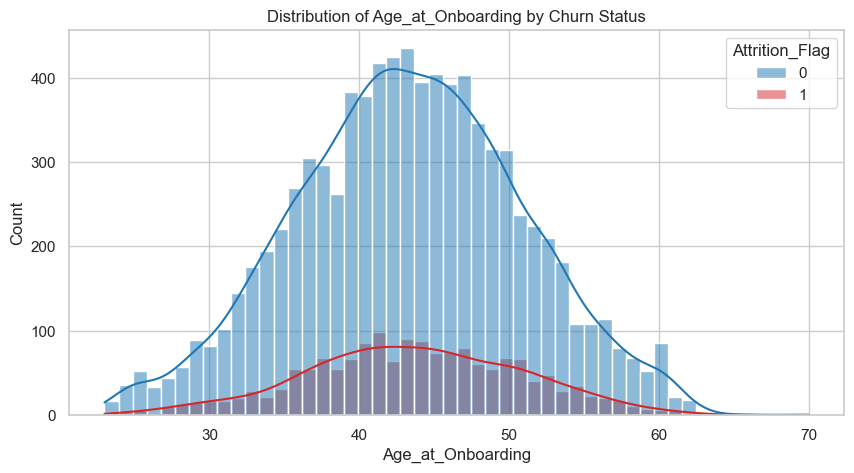

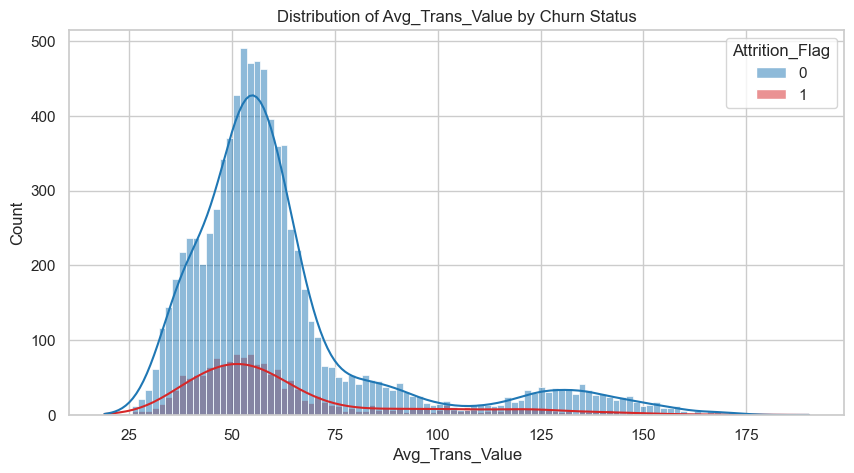

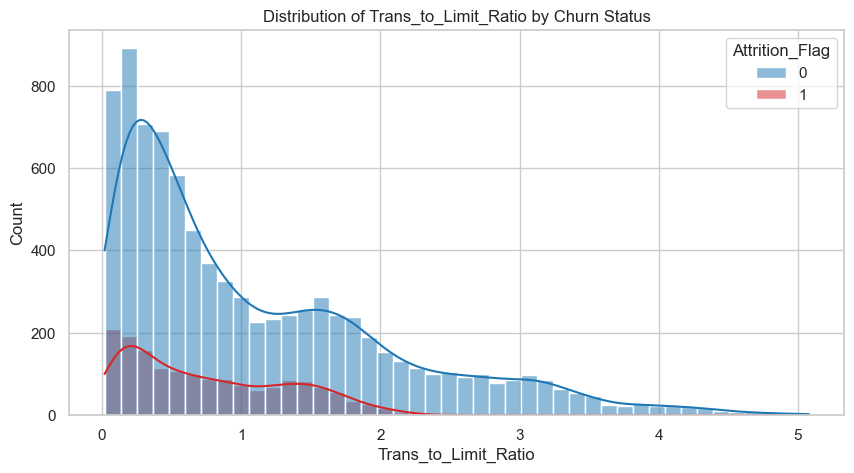

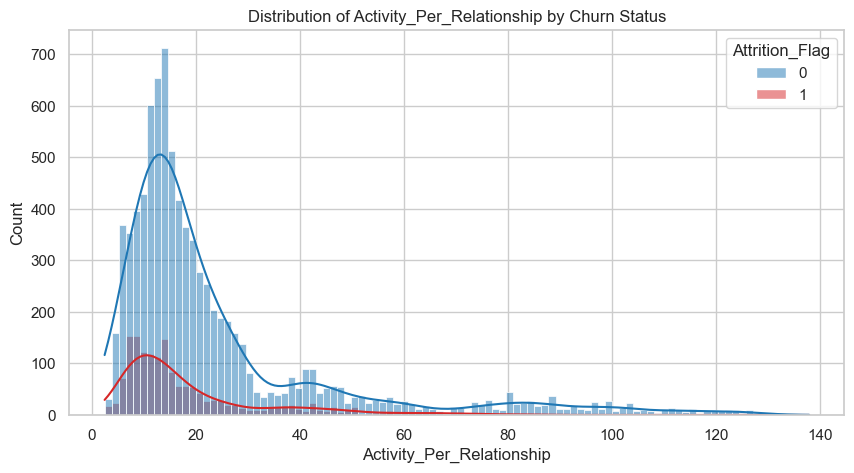

In [75]:
new_features = ['Age_at_Onboarding','Avg_Trans_Value', 'Trans_to_Limit_Ratio', 'Activity_Per_Relationship']

for feature in new_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=feature, hue='Attrition_Flag',kde=True, palette=custom_palette, fill=True, common_norm=False)
    plt.title(f'Distribution of {feature} by Churn Status')
    plt.show()

In [76]:
df.columns.to_list()

['Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Age_at_Onboarding',
 'Avg_Trans_Value',
 'Trans_to_Limit_Ratio',
 'Activity_Per_Relationship']

In [77]:
save_dir = os.path.join('..', 'data', 'processed')
os.makedirs(save_dir, exist_ok=True)
file_name = 'BankChurners_Cleaned_Featured.csv'
full_path = os.path.join(save_dir, file_name)
df.to_csv(full_path, index=False)   

print(f"Successed: {os.path.abspath(full_path)}")

Successed: d:\proj1\data\processed\BankChurners_Cleaned_Featured.csv
